Cleaning Data

Import modules

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

In [3]:
data_raw = pd.concat([train_raw, test_raw], ignore_index = True, axis = 0)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
data_raw.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [5]:
data = data_raw.set_index(['Id'])

In [6]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [7]:
count_nan = {}
for col in data.columns.values:
    count_nan[col] = data[col].isna().sum()
nan_df = pd.DataFrame.from_dict(list(count_nan.items()))
nan_df.rename(columns = {0: 'DType', 1: 'NaN Count'}, inplace = True)
nan_df['Missing %'] = round(nan_df['NaN Count']/len(data) * 100, 2)

In [8]:
print(nan_df.to_string())

            DType  NaN Count  Missing %
0        1stFlrSF          0       0.00
1        2ndFlrSF          0       0.00
2       3SsnPorch          0       0.00
3           Alley       2721      93.22
4    BedroomAbvGr          0       0.00
5        BldgType          0       0.00
6        BsmtCond         82       2.81
7    BsmtExposure         82       2.81
8      BsmtFinSF1          1       0.03
9      BsmtFinSF2          1       0.03
10   BsmtFinType1         79       2.71
11   BsmtFinType2         80       2.74
12   BsmtFullBath          2       0.07
13   BsmtHalfBath          2       0.07
14       BsmtQual         81       2.77
15      BsmtUnfSF          1       0.03
16     CentralAir          0       0.00
17     Condition1          0       0.00
18     Condition2          0       0.00
19     Electrical          1       0.03
20  EnclosedPorch          0       0.00
21      ExterCond          0       0.00
22      ExterQual          0       0.00
23    Exterior1st          1       0.03


The dataset is mostly complete, there are a few columns such as Alley, Fence, MiscFeature, and PoolQC that are very incomplete with a lot of NaNs (80%+ incomplete). We will probably drop these columns except for Fence. Before we delete them though, let's if there's anything usable in them.

In [9]:
data['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

There's a whoopping 10 data points in a data set of almost 3000. Probably best to drop it.

In [10]:
data.drop('PoolQC', inplace = True, axis = 1)

In [11]:
data['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [12]:
data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [13]:
data['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

For the Fence data point, an 'NA' datapoint was replaced by pandas with 'NaN'. The 'NA' identifier means that the property has no fence. To avoid confusion, we will fill these with a more readable point.

In [14]:
data['Fence'].fillna('NoFence', inplace = True)

In [15]:
data['Alley'].fillna('NoAlley', inplace = True)

In [16]:
data['MiscFeature'].fillna('None', inplace = True)

In [17]:
data['LotArea'].corr(data['LotFrontage'])

0.48989557038716697

We want to fill the missing LotFrontage variables, and it seems there are around 4 categories that describe the lot, so we will create a new dataframe

In [18]:
lot_df = data[['LotArea', 'LotShape', 'LotFrontage', 'LotConfig']].copy()
lot_df = lot_df[lot_df.LotFrontage.notnull()]

In [19]:
lot_df['LotShape'].value_counts()

Reg    1727
IR1     647
IR2      48
IR3      11
Name: LotShape, dtype: int64

In [20]:
lot_df['LotConfig'].value_counts()

Inside     1862
Corner      407
CulDSac      89
FR2          65
FR3          10
Name: LotConfig, dtype: int64

In [21]:
lot_df.apply(lambda x : pd.factorize(x)[0])+1

,LotArea,LotShape,LotFrontage,LotConfig
Id,,,,
1,1,1,1,1
2,2,1,2,2
3,3,2,3,1
4,4,2,4,3
5,5,2,5,2
...,...,...,...,...
2915,450,1,36,1
2916,1596,1,36,1
2917,1597,1,106,1


In [22]:
from scipy.stats import stats

In [23]:
F, p = stats.f_oneway(lot_df[lot_df.LotShape == 'Reg'].LotFrontage,
                      lot_df[lot_df.LotShape == 'IR1'].LotFrontage,
                      lot_df[lot_df.LotShape == 'IR2'].LotFrontage,
                      lot_df[lot_df.LotShape == 'IR3'].LotFrontage)
print('The F score for the LotShape variable is ' + str(round(F, 3)))

The F score for the LotShape variable is 37.466


The F Score is 37.466, which indicates there is a reasonable amount of correlation between the shape of the lot and the frontage.

In [24]:
F, p = stats.f_oneway(lot_df[lot_df.LotConfig == 'Corner'].LotFrontage,
                      lot_df[lot_df.LotConfig == 'CulDSac'].LotFrontage,
                      lot_df[lot_df.LotConfig == 'FR2'].LotFrontage,
                      lot_df[lot_df.LotConfig == 'FR3'].LotFrontage,
                      lot_df[lot_df.LotConfig == 'Inside'].LotFrontage)
print('The F score for the LotConfig variable is ' + str(round(F, 3)))

The F score for the LotConfig variable is 49.689


The F Score is 49.689, which indicates there is an even higher amount of correlation between the configuration of the lot and the frontage. This makes the most sense as the configuration of the lot in regards to the street will have a significant effect of how much frontage there is. 

Running Regressions on this the LotFrontage variable: Using One-Hot

In [25]:
from sklearn import linear_model

In [26]:
lot_df = data[['LotArea', 'LotShape', 'LotFrontage', 'LotConfig']].copy()
lot_df = pd.get_dummies(lot_df, columns = ['LotConfig'], prefix = 'Lc')
lot_df = pd.get_dummies(lot_df, columns = ['LotShape'], prefix = 'Ls')

In [27]:
parameters = [x for x in lot_df.columns.values if x != 'LotFrontage']

In [28]:
lot_model = linear_model.LinearRegression()
lot_model.fit(X = lot_df[lot_df.LotFrontage.notnull()][parameters], y = lot_df[lot_df.LotFrontage.notnull()]['LotFrontage'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lot_df.loc[lot_df['LotFrontage'].isnull(), 'LotFrontage'] = lot_model.predict(lot_df[parameters])[lot_df['LotFrontage'].isnull()]

In [30]:
lot_df['LotFrontage'] = round(lot_df['LotFrontage'], 0)

In [31]:
data['LotFrontage'] = lot_df['LotFrontage']

In [32]:
count_nan = {}
for col in data.columns.values:
    count_nan[col] = data[col].isna().sum()
nan_df = pd.DataFrame.from_dict(list(count_nan.items()))
nan_df.rename(columns = {0: 'DType', 1: 'NaN Count'}, inplace = True)
nan_df['Missing %'] = round(nan_df['NaN Count']/len(data) * 100, 2)
nan_df.to_csv('nan_tracker.csv')

Checking the value counts for the next variable set: Basement Details

The "Nan" values are actually indicators that the house does not have a basement

In [33]:
data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [34]:
data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [35]:
data['BsmtCond'].fillna('NoBs',inplace = True)
data['BsmtExposure'].fillna('NoBs', inplace = True)

In [36]:
data['BsmtFinSF1'].value_counts().sum()

2918

The single missing value in the BsmtFinSF1 and SF2 columns are an entry in the test set. After looking at it, it appears that it doesn't have a basement, so fillna will work nicely here. 

In [37]:
data['BsmtFinSF1'].fillna(0, inplace = True)
data['BsmtFinSF2'].fillna(0, inplace = True)
data['BsmtUnfSF'].fillna(0, inplace = True)

In [38]:
data['BsmtFinType1'].fillna('NoBs', inplace = True)
data['BsmtFinType2'].fillna('NoBs', inplace = True)
data['BsmtFullBath'].fillna(0, inplace = True)
data['BsmtHalfBath'].fillna(0, inplace = True)
data['BsmtQual'].fillna('NoBs', inplace = True)
data['TotalBsmtSF'].fillna(0, inplace = True)

In [39]:
data['Electrical'].fillna('SBrkr', inplace = True)

In [40]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [41]:
data[data['RoofMatl'] == 'Tar&Grv']['Exterior1st'].value_counts()

Plywood    13
Wd Sdng     4
WdShing     2
BrkComm     1
HdBoard     1
VinylSd     1
Name: Exterior1st, dtype: int64

There is one value missing in the Exterior1st and 2nd columns. By eyeballing, we can see that there's correlation between Exterior1st and Roof Material. Looking at the MsVnrType (Masonry Veneer Type) we can see that there is no masonry. Because most RoofMaterial that is made with Tr&Grv use plywood as the exterior, and the MsVnrType is "None" we will fill the NA with "Plywood"

In [42]:
data['Exterior1st'].fillna('Plywood',inplace= True)
data['Exterior2nd'].fillna('Plywood',inplace= True)

In [43]:
data['FireplaceQu'].fillna('NoFp', inplace = True)

In [44]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Because the Functional column has two NA variables, we can deduce their functionality from other columns, such as KitchenQual and LowQualFinSF

In [45]:
data[data['KitchenQual'] == 'Fa']['Functional'].value_counts()

Typ     59
Mod      3
Min1     2
Min2     2
Maj1     2
Maj2     1
Name: Functional, dtype: int64

In [46]:
data[data['HeatingQC'] == 'Po']['Functional'].value_counts()

Typ    2
Name: Functional, dtype: int64

In [47]:
data[data['Electrical'] == 'FuseA']['Functional'].value_counts()

Typ     162
Min2      9
Mod       7
Min1      6
Maj1      2
Maj2      1
Name: Functional, dtype: int64

Based on how common the "Typical" functional column is despite the lower quality of other categories, we wil replace ID 2217 and 2474 with 'Typ'

In [48]:
data['Functional'].fillna('Typ', inplace = True)

The garage section is mostly straightforward with only one missing datapoint for ID 2577. It has a detached garage according to the GarageType column. Therefore,  we can estimate it based on the typical metrics of a Detached garage.

In [49]:
data[data['GarageType'] == 'Detchd']['GarageArea'].median()

399.5

In [50]:
data[data['GarageType'] == 'Detchd']['GarageCars'].median()

2.0

In [51]:
data[data['GarageType'] == 'Detchd']['GarageYrBlt'].median()

1962.0

In [52]:
data[data['GarageType'] == 'Detchd']['GarageFinish'].mode()

0    Unf
dtype: object

In [53]:
data[data['GarageType'] == 'Detchd']['GarageQual'].mode()

0    TA
dtype: object

In [54]:
data[data['GarageType'] == 'Detchd']['GarageCond'].mode()

0    TA
dtype: object

In [55]:
data['GarageArea'].fillna(data[data['GarageType'] == 'Detchd']['GarageArea'].median(), inplace = True)
data['GarageCars'].fillna(data[data['GarageType'] == 'Detchd']['GarageCars'].median(), inplace = True)

In [56]:
data[data['GarageArea'] == 399.5]['GarageYrBlt'].fillna(data[data['GarageType'] == 'Detchd']['GarageYrBlt'].median(), inplace = True)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [57]:
data[data['GarageArea'] == 399.5]['GarageQual'].fillna(data[data['GarageType'] == 'Detchd']['GarageQual'].mode(), inplace = True)

In [58]:
data[data['GarageArea'] == 399.5]['GarageCond'].fillna(data[data['GarageType'] == 'Detchd']['GarageCond'].mode(), inplace = True)

In [59]:
data[data['GarageArea'] == 399.5]['GarageFinish'].fillna(data[data['GarageType'] == 'Detchd']['GarageFinish'].mode(), inplace = True)

In [60]:
garage_parameters = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']

In [61]:
for col in garage_parameters:
    data[col].fillna('NoGar', inplace = True)

In [62]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [63]:
data['KitchenQual'].fillna('TA', inplace = True)

In [64]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

From the NA values in the test set, there are four entries that are missing. We want to look at the characteristics of these houses compared to the average of the zoning type categories to deduce what the missing values might be.

First we look at Lot Area, my  hypothesis is that higher density residential areas would have smaller lot areas:

In [65]:
data[data['MSZoning'] == 'RL']['LotArea'].median()

10000.0

In [66]:
data[data['MSZoning'] == 'RL']['LotArea'].mean()

11169.471964679911

In [67]:
data[data['MSZoning'] == 'RL']['LotArea'].min()

1700

In [68]:
data[data['MSZoning'] == 'RL']['LotArea'].max()

215245

There is quite a bit of variance for the Low Residential Zoning Type (RL). Let's look at medium and high.

In [69]:
print('Medium Density --- Median --- ' + str(data[data['MSZoning'] == 'RM']['LotArea'].median()))
print('Medium Density --- Mean --- ' + str(data[data['MSZoning'] == 'RM']['LotArea'].mean()))
print('Medium Density --- Min --- ' + str(data[data['MSZoning'] == 'RM']['LotArea'].min()))
print('Medium Density --- Max --- ' + str(data[data['MSZoning'] == 'RM']['LotArea'].max()))

Medium Density --- Median --- 6090.0
Medium Density --- Mean --- 6400.239130434783
Medium Density --- Min --- 1300
Medium Density --- Max --- 33120


In [70]:
print('High Density --- Median --- ' + str(data[data['MSZoning'] == 'RH']['LotArea'].median()))
print('High Density --- Mean --- ' + str(data[data['MSZoning'] == 'RH']['LotArea'].mean()))
print('High Density --- Min --- ' + str(data[data['MSZoning'] == 'RH']['LotArea'].min()))
print('High Density --- Max --- ' + str(data[data['MSZoning'] == 'RH']['LotArea'].max()))

High Density --- Median --- 7168.0
High Density --- Mean --- 7506.461538461538
High Density --- Min --- 4058
High Density --- Max --- 12155


My hypothesis seems to be partially correct. However, a smaller lot size doesn't necessarily mean it's higher, medium, or lower density. There is also quite a bit of variance on the "Low Density" zoning. We should look at other variables before making an educated guess.

We wil look at the Street paving, I would assume that a gravel road would mean that a residential area is less dense, and a paved road would mean more dense:

In [71]:
print(data[data['MSZoning'] == 'RL']['Street'].value_counts())

Pave    2261
Grvl       4
Name: Street, dtype: int64


In [72]:
print(data[data['MSZoning'] == 'RM']['Street'].value_counts())

Pave    458
Grvl      2
Name: Street, dtype: int64


In [73]:
print(data[data['MSZoning'] == 'RH']['Street'].value_counts())

Pave    26
Name: Street, dtype: int64


Damn, we're getting closer though! At least we can assume that a high residential zoning area would have a paved road. So we can assume that ID 1916 is not high density. 

In [74]:
print('Low Density --- BldgType')
print(data[data['MSZoning'] == 'RL']['BldgType'].value_counts()/data[data['MSZoning'] == 'RL']['BldgType'].value_counts().sum())
print('Med Density --- BldgType')
print(data[data['MSZoning'] == 'RM']['BldgType'].value_counts()/data[data['MSZoning'] == 'RM']['BldgType'].value_counts().sum())
print('High Density --- BldgType')
print(data[data['MSZoning'] == 'RM']['BldgType'].value_counts()/data[data['MSZoning'] == 'RM']['BldgType'].value_counts().sum())

Low Density --- BldgType
1Fam      0.886976
TwnhsE    0.048565
Duplex    0.040618
2fmCon    0.013245
Twnhs     0.010596
Name: BldgType, dtype: float64
Med Density --- BldgType
1Fam      0.654348
TwnhsE    0.147826
Twnhs     0.115217
2fmCon    0.054348
Duplex    0.028261
Name: BldgType, dtype: float64
High Density --- BldgType
1Fam      0.654348
TwnhsE    0.147826
Twnhs     0.115217
2fmCon    0.054348
Duplex    0.028261
Name: BldgType, dtype: float64


Looking at the density based on building type, there seems to be a higher likelihood that townhouses and duplexes are med and high density zoning. A considerable amount of these zoning types still have single-family homes, so there's not much to deduce from this data point. Let's look at neighborhoods. Only two neighborhoods are showing up here "IDOTRR" and "Mitchel", so we can maybe look at these two neighboords to see their distribution. Houses in the same neighborhoods tend to have a similar zoning type:

In [75]:
print('IDOTRR --- Zoning Distribution')
print(data[data['Neighborhood'] == 'IDOTRR']['MSZoning'].value_counts())
print('Mitchel --- Zoning Distribution')
print(data[data['Neighborhood'] == 'Mitchel']['MSZoning'].value_counts())

IDOTRR --- Zoning Distribution
RM         68
C (all)    22
Name: MSZoning, dtype: int64
Mitchel --- Zoning Distribution
RL    104
RM      9
Name: MSZoning, dtype: int64


As part of our due diligence, let's look at the neighborhoods and see what their distributions look like:

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data.groupby(['Neighborhood'])['MSZoning'].value_counts()
print(data.groupby(['Neighborhood', 'MSZoning'])['LotArea'].agg(pd.Series.mode))
print(data.groupby(['Neighborhood', 'MSZoning'])['LotArea'].agg(pd.Series.median))
print(data.groupby(['Neighborhood', 'MSZoning'])['LotArea'].agg(pd.Series.mean))

Neighborhood  MSZoning
Blmngtn       RL                                                       3182
              RM                                                       3072
Blueste       RM                                                       3907
BrDale        RM                                                       1680
BrkSide       RL                                               [5000, 9144]
              RM                                                       6000
ClearCr       RL          [1700, 2887, 5271, 6930, 8816, 10005, 10029, 1...
CollgCr       RL                                                       7200
              RM                                                       4435
Crawfor       RH                                               [6270, 7136]
              RL                                                      15600
              RM                                         [3811, 3842, 3843]
Edwards       RH                                               [4

Looking at the neighborhoods, IDOTRR is unique because it has almost all the commercial district zoning in its distribution, and it has only medium residential and commercial zoning. Looking at the commercial district zoning:

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: Runtime

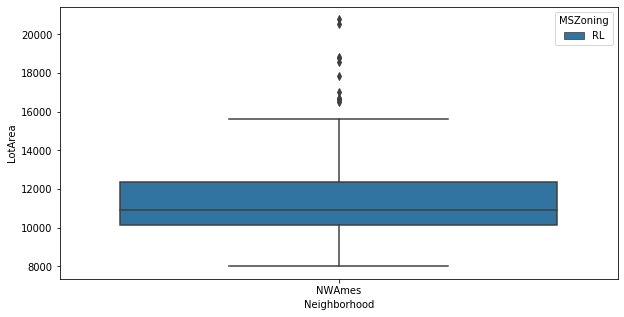

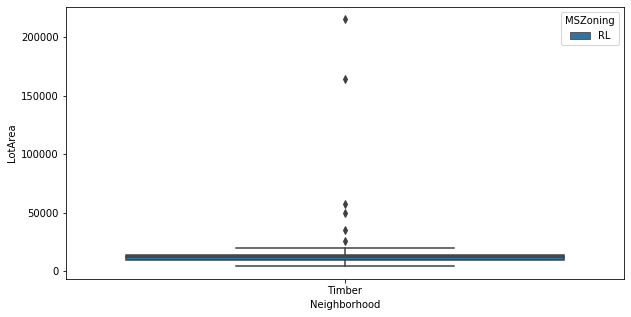

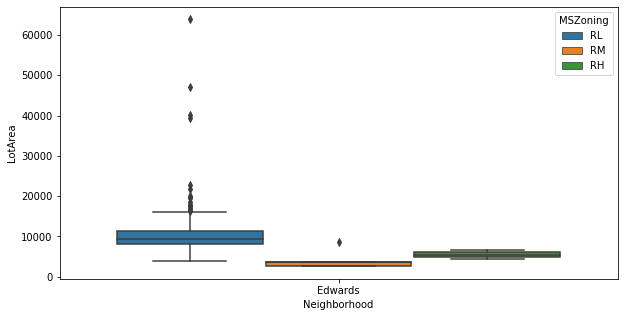

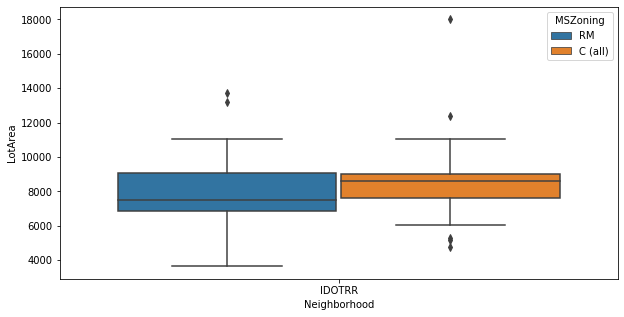

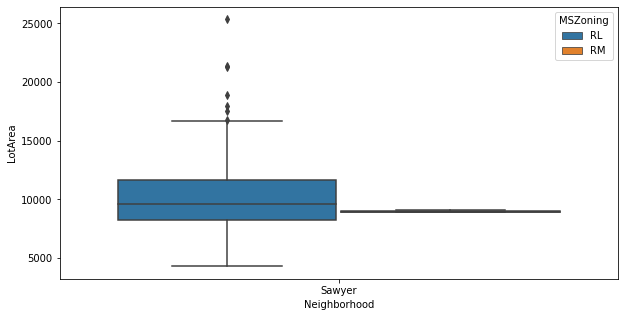

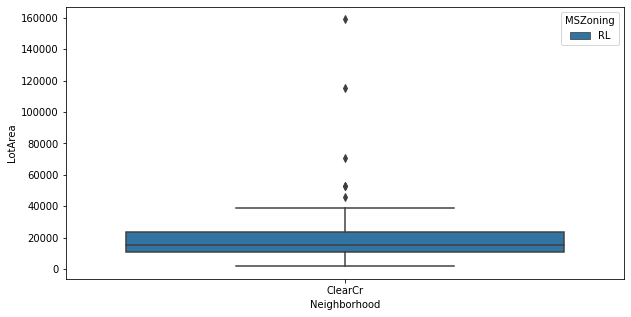

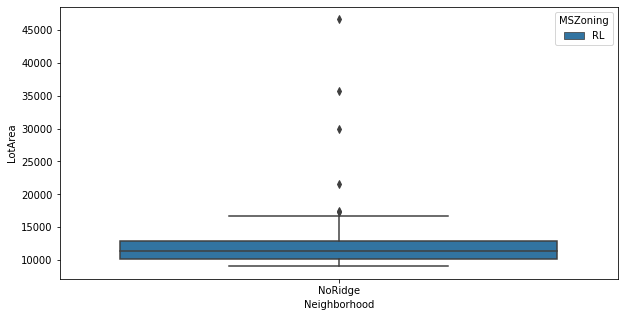

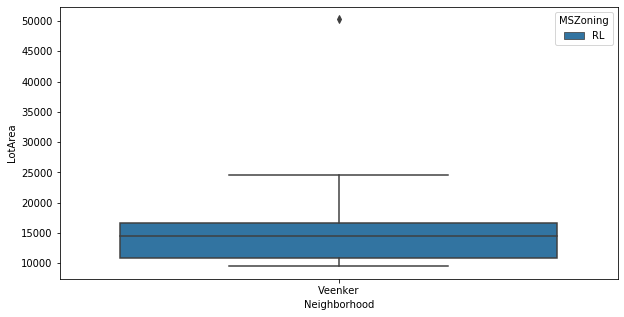

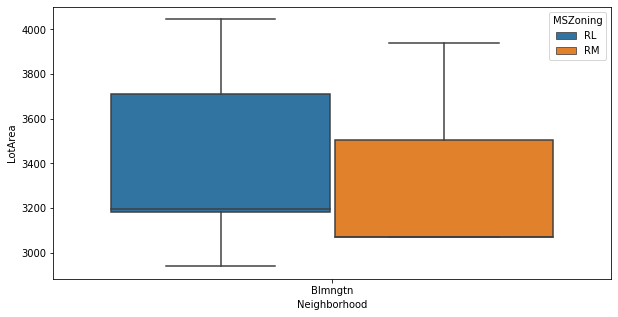

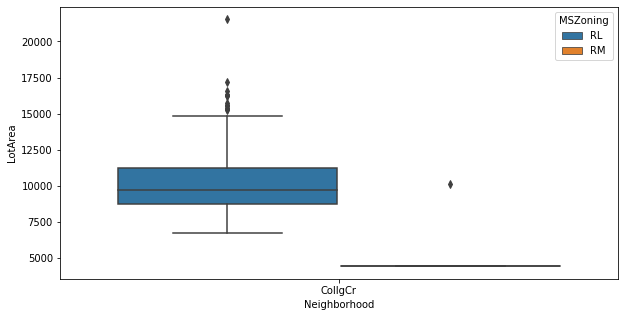

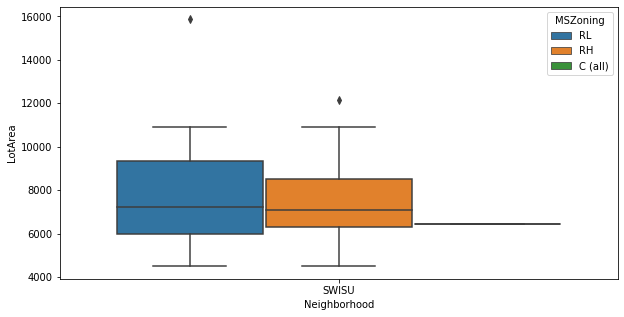

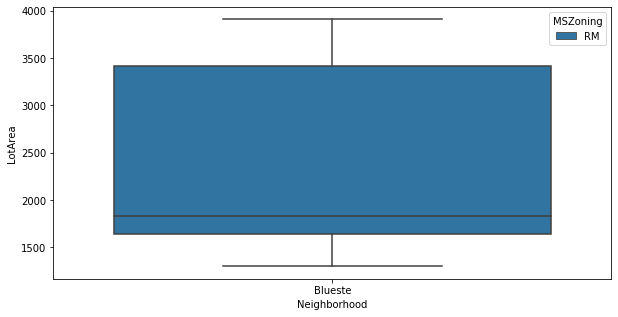

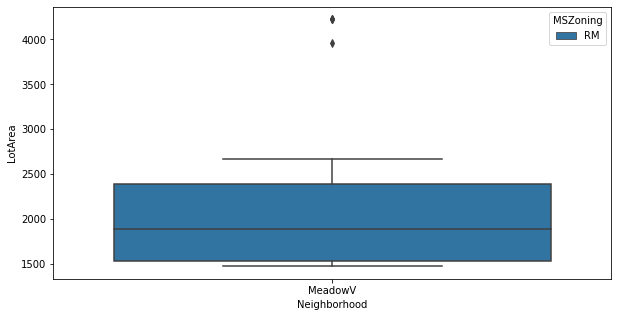

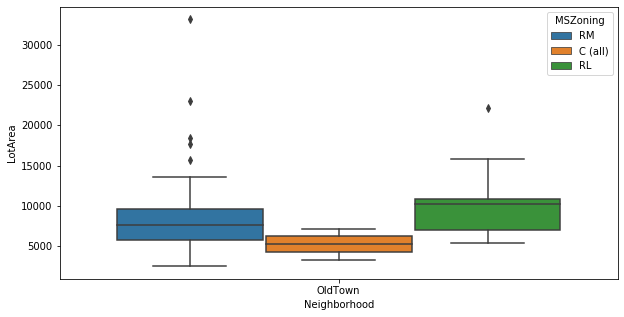

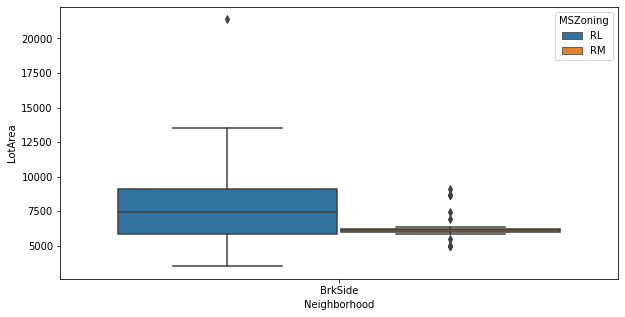

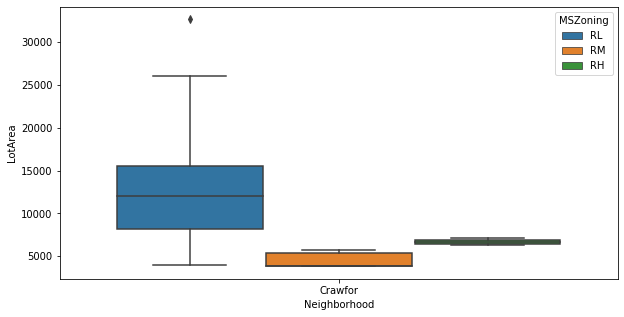

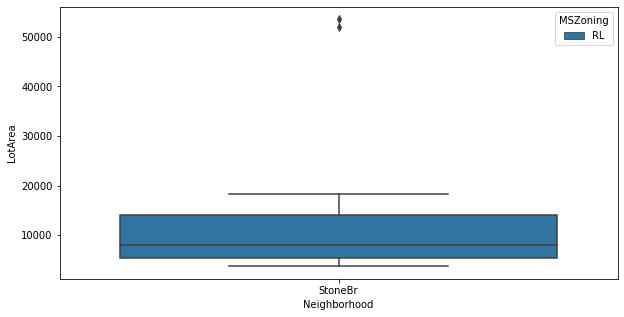

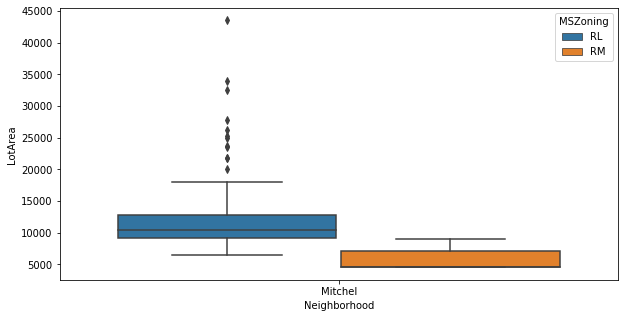

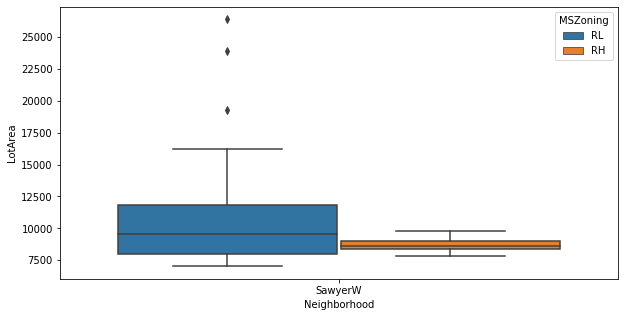

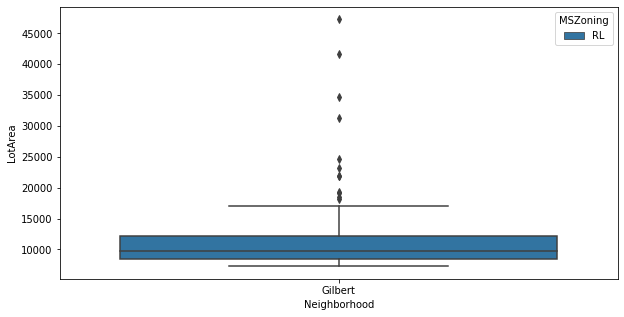

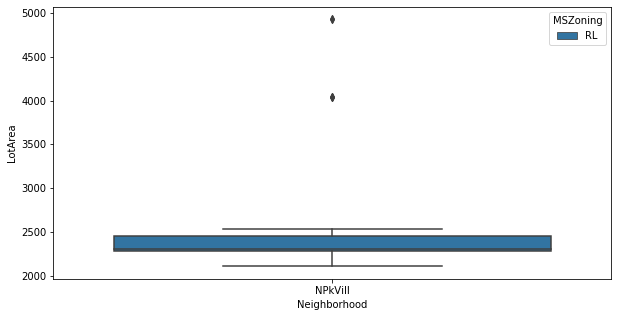

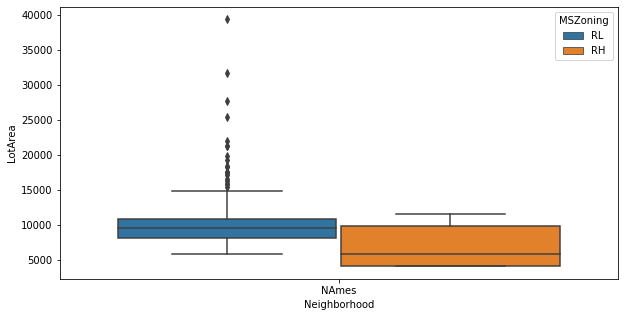

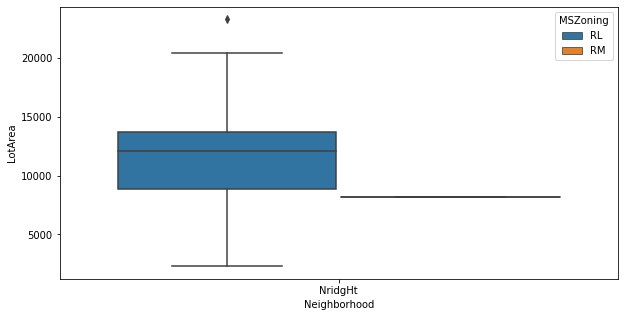

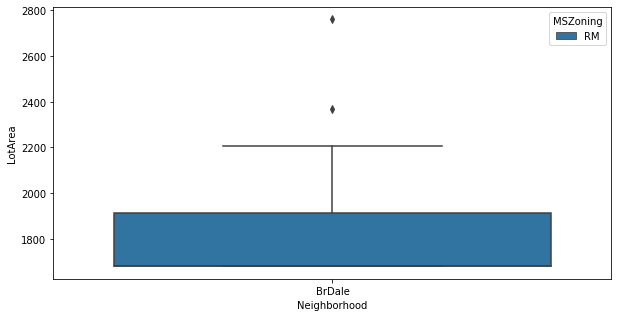

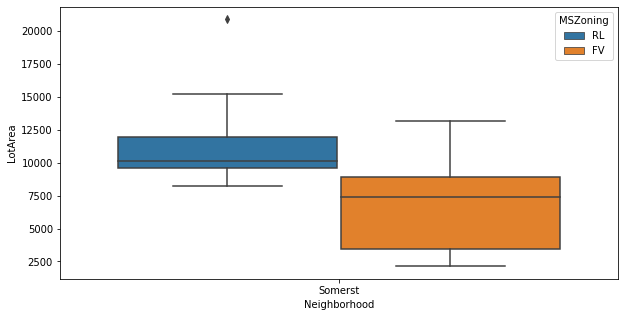

In [78]:
neighborhood_set = set(data['Neighborhood'].values.tolist())
for item in neighborhood_set:
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    temp_df = data[data['Neighborhood'] == item]
    g1 = sns.boxplot(x = 'Neighborhood', y = 'LotArea', hue = 'MSZoning', data = temp_df, ax = ax)

It's pretty clear that commercial zoning has a skew of its data towards larger lot-sizes. Looking at the missing values for MSZoning, these LotArea sizes are pretty large, two of which are above 20k in area. We have several conclusions we can draw from this data that we collected on the IDOTRR neighborhood: 
1. It is made up of all medium residential and commercial
2. Some outlier plot sizes in this district are probably commercial spaces as the distribution has a higher median and larger outliers. However, only medium density residential has another datapoint where the LotArea metrics go as high as the outliers we see in IDOTRR
We will replace all the NA with "RM" for now until we have evidence that says otherwise. 

In [79]:
data['MSZoning'].fillna('RM', inplace = True)

Looking at the Masonry Veneer data:

In [80]:
print(data.groupby(['Neighborhood', 'BldgType', 'Exterior1st', 'Exterior2nd'])['MasVnrType'].value_counts().to_string())

Neighborhood  BldgType  Exterior1st  Exterior2nd  MasVnrType
Blmngtn       1Fam      VinylSd      VinylSd      BrkFace         2
                        WdShing      Wd Shng      BrkFace         1
              TwnhsE    VinylSd      VinylSd      BrkFace        23
                                                  None            1
                        WdShing      Wd Shng      BrkFace         1
Blueste       Twnhs     MetalSd      MetalSd      None            5
              TwnhsE    HdBoard      HdBoard      None            3
                        MetalSd      MetalSd      None            2
BrDale        Twnhs     CemntBd      CmentBd      BrkFace         2
                        HdBoard      HdBoard      BrkFace        21
                                     ImStucc      BrkFace         1
              TwnhsE    HdBoard      HdBoard      BrkFace         5
                                                  None            1
BrkSide       1Fam      AsbShng      AsbShng      None 

If the house is not a Single-Family home with VinylSd (i.e. townhouse, duplex), then it is significantly more likely to have some sort of masonry veneer. The single-family homes are slightly more likely to not have masonry. As a result, we will fill the NA values with "None" if it is a single family home, and "Stone" if it is a townhouse with VinylSd as the data suggests that townhouses with Vinyl Sides have Stone masonry.

In [81]:
data[data['BldgType'] == 'TwnhsE']['MasVnrType'].fillna('Stone', inplace = True)
data[data['BldgType'] == 'TwnhsE']['MasVnrArea'].fillna(data[(data['BldgType'] == 'TwnhsE') & (data['Exterior1st'] == 'VinylSd')]['MasVnrArea'].mean(), inplace = True)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [82]:
data[data['Neighborhood'] == 'Mitchel']['MasVnrType'].fillna('BrkFace', inplace = True)

In [83]:
data['MasVnrType'].fillna('None', inplace = True)

In [84]:
data['MasVnrArea'].fillna(0, inplace = True)

In [85]:
data['MasVnrType'].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [86]:
data['SaleType'].fillna('WD', inplace = True)

In [87]:
data['Utilities'].fillna('AllPub', inplace = True)

In [88]:
data.to_csv('cleaned_data.csv')